# Laboratorium 2 

1. Importowanie bibiotek

In [1]:
import numpy as np
import scipy.linalg
from time import time
import matplotlib.pyplot as plt

## Rekurencyjne odwracanie macierzy

##### Macierz odwrotna jest określona tylko dla macierzy kwadratowych, których wyznacznik jest niezerowy. Macierz odwrotna 𝐴−1 do macierzy kwadratowej 𝐴 to macierz spełniająca równanie:

#### $$\begin{bmatrix} A_{11} & A_{12} \\ A_{21} & A_{22} \end{bmatrix}\begin{bmatrix} X_{11} & X_{12} \\ X_{21} & X_{22} \end{bmatrix} = \begin{bmatrix} I & 0 \\ 0 & I \end{bmatrix}$$

##### ,gdzie I to macierz jednostkowa

#### Pseudokod:

<div style="text-align:left">
    <img src="z2.png" style="height:400px" />
</div>

In [2]:
def inverse_matrix_recursive(A):
    """
    Computes the inverse of a matrix using the recursive formula
    """
    global operations_count

    n = A.shape[0]
    A11 = A[:n//2, :n//2]
    A12 = A[:n//2, n//2:]
    A21 = A[n//2:, :n//2]
    A22 = A[n//2:, n//2:]


    if n == 1:
        operations_count += 1
        return np.array([[1/A[0,0]]])
    
    A11_inv = inverse_matrix_recursive(A11)
    A21_A11_inv = A21 @ A11_inv
    S22 = A22 - A21_A11_inv @ A12
    operations_count += 2 * (n//2) ** 3  # multiplication of matrices
    operations_count += (n//2) ** 2  # subtraction of matrices
    operations_count += 2 * (n//2) ** 2 * (n//2-1)  # addition in multiplication of matrices

    S22_inv = inverse_matrix_recursive(S22)
    B11 = A11_inv +  A11_inv @ A12 @ S22_inv @ A21_A11_inv
    operations_count += 3 * (n//2) ** 3  # multiplication of matrices
    operations_count += (n//2) ** 2  # addition of matrices
    operations_count += 3 * (n//2) ** 2 * (n//2-1)  # addition in multiplication of matrices
    
    B12 = -A11_inv @ A12 @ S22_inv
    operations_count += 2 * (n//2) ** 3  # multiplication of matrices
    operations_count += 2 * (n//2) ** 2 * (n//2-1)  # addition in multiplication of matrices

    B21 = -S22_inv @ A21_A11_inv
    operations_count += (n//2) ** 3  # multiplication of matrices
    operations_count += (n//2) ** 2 * (n//2-1)  # addition in multiplication of matrices
    
    B22 = S22_inv

    B = np.zeros((n,n))
    B[:n//2, :n//2] = B11
    B[:n//2, n//2:] = B12
    B[n//2:, :n//2] = B21
    B[n//2:, n//2:] = B22
    return B


## Rekurencyjna faktoryzacja LU

##### Niech dana będzie macierz A: 

#### $$ A = \begin{bmatrix} A_{11} & A_{12} \\ A_{21} & A_{22} \end{bmatrix}$$

##### W metodzie LU macierz współczynników A zapisywana jest jako iloczyn pewnych macierzy dolnej L i górnej U:

#### $$ LU = \begin{bmatrix} L_{11} & 0 \\ L_{21} & L_{22} \end{bmatrix} \begin{bmatrix} U_{11} & U_{12} \\ 0 & U_{22} \end{bmatrix}$$

#### Pseudokod:

<div style="text-align:left">
    <img src="z1.png" style="height:400px" />
</div>

In [3]:
def LU_factorization_recursive(A):
    """
    Computes the LU factorization of a matrix using the recursive formula
    """
    global operations_count
    n = A.shape[0]
    A11 = A[:n//2, :n//2]
    A12 = A[:n//2, n//2:]
    A21 = A[n//2:, :n//2]
    A22 = A[n//2:, n//2:]

    if n == 1:
        return np.array([[1]], dtype=np.float64), np.array([[A[0,0]]], dtype=np.float64)
    
    L11, U11 = LU_factorization_recursive(A11)
    U11_inv = inverse_matrix_recursive(U11)
    L21 = A21 @ U11_inv
    operations_count += (n//2) ** 3  # multiplication of matrices
    operations_count += (n//2) ** 2 * (n//2-1)  # addition in multiplication of matrices
    
    L11_inv = inverse_matrix_recursive(L11)
    U12 = L11_inv @ A12
    operations_count += (n//2) ** 3  # multiplication of matrices
    operations_count += (n//2) ** 2 * (n//2-1)  # addition in multiplication of matrices

    L22 = A22 - L21 @ U12
    operations_count += (n//2) ** 3  # multiplication of matrices
    operations_count += (n//2) ** 2 * (n//2-1)  # addition in multiplication of matrices
    operations_count += (n//2) ** 2  # subtraction of matrices

    Ls, Us = LU_factorization_recursive(L22)
    U22 = Us
    L22 = Ls
    L = np.zeros((n,n))
    U = np.zeros((n,n))
    L[:n//2, :n//2] = L11
    L[n//2:, :n//2] = L21
    L[n//2:, n//2:] = L22
    U[:n//2, :n//2] = U11
    U[:n//2, n//2:] = U12
    U[n//2:, n//2:] = U22
    return L, U


## Rekurencyjne obliczanie wyznacznika

##### Wyznacznik macierzy kwadratowej A oznaczany jest przez |A| lub det(A)

##### Korzystając z metody faktoryzacji LU, wartość wyznacznika sprowadza się do:

#### $$ det(A) = l_{11} * ... * l_{nn} * u_{11} * ... * u_{nn} $$

##### ,gdzie lii to przekątna L, uii to przekątna U 

In [4]:
def det_matrix_recursive(A):
    """
    Computes the determinant of a matrix using the recursive formula
    """
    global operations_count
    L,U = LU_factorization_recursive(A)
    det = np.prod(np.diag(U)) * np.prod(np.diag(L))
    operations_count += (L.shape[0] - 1) # multiplication of elements of diagonal
    operations_count += (U.shape[0] - 1) # multiplication of elements of diagonal
    operations_count += 1 # multiplication of results
    
    return det

## Wykres czasu wykonania odwracania macierzy

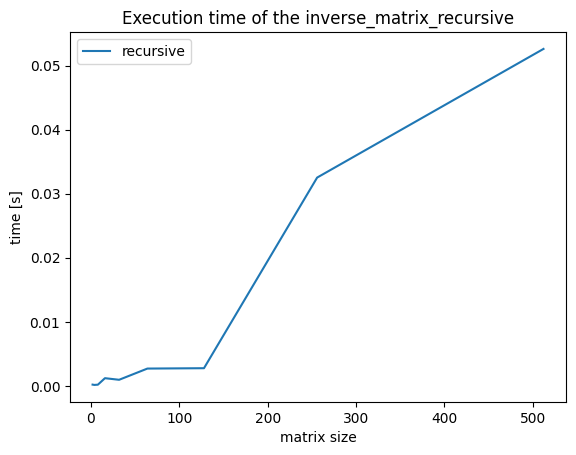

In [5]:
# define the matrix sizes to test
matrix_sizes = [2**i for i in range(1, 10)]

# measure the execution time for each matrix size
inv_times = []
inv_operations_counts = []
for n in matrix_sizes:
    A = np.random.rand(n, n)
    start_time = time()
    operations_count = 0
    inverse_matrix_recursive(A)
    inv_operations_counts.append(operations_count)
    end_time = time()
    inv_times.append(end_time - start_time)
# plot the execution time
plt.plot(matrix_sizes, inv_times, label='recursive')
plt.xlabel('matrix size')
plt.ylabel('time [s]')
plt.title('Execution time of the inverse_matrix_recursive')
plt.legend()
plt.show()

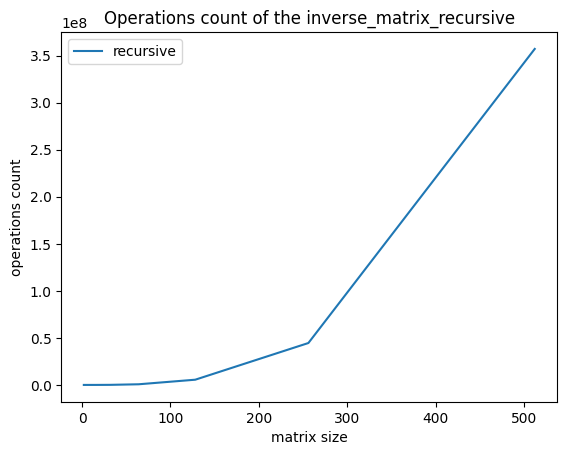

In [6]:
plt.plot(matrix_sizes, inv_operations_counts, label='recursive')
plt.xlabel('matrix size')
plt.ylabel('operations count')
plt.title('Operations count of the inverse_matrix_recursive')
plt.legend()
plt.show()

## Wykres czasu wykonania rekurencyjnej faktoryzacji LU 

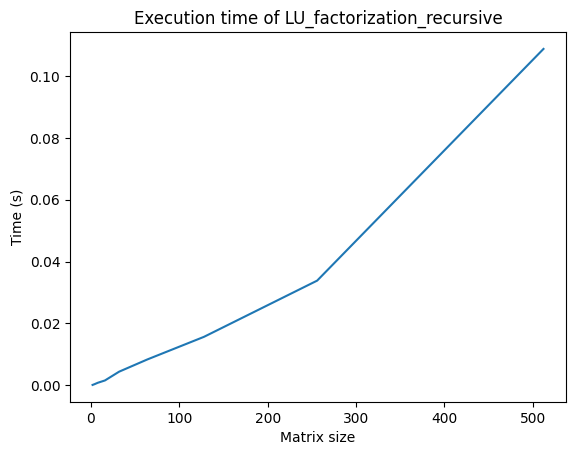

In [7]:
# define the matrix sizes to test
matrix_sizes = [2**i for i in range(1, 10)]

# measure the execution time for each matrix size
lu_times = []
lu_operations_counts = []
for n in matrix_sizes:
    A = np.random.rand(n, n)
    start_time = time()
    operations_count = 0
    LU_factorization_recursive(A)
    lu_operations_counts.append(operations_count)
    end_time = time()
    lu_times.append(end_time - start_time)

# plot the results
plt.plot(matrix_sizes, lu_times)
plt.xlabel('Matrix size')
plt.ylabel('Time (s)')
plt.title('Execution time of LU_factorization_recursive')
plt.show()


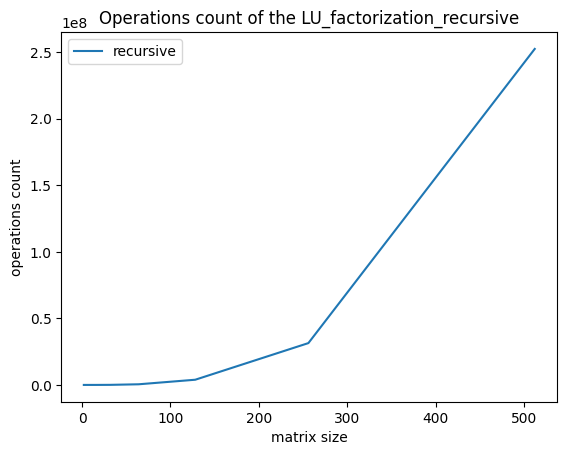

In [8]:
plt.plot(matrix_sizes, lu_operations_counts, label='recursive')
plt.xlabel('matrix size')
plt.ylabel('operations count')
plt.title('Operations count of the LU_factorization_recursive')
plt.legend()
plt.show()

## Wykres czasu wykonania rekurencyjnego obliczania wyznacznika

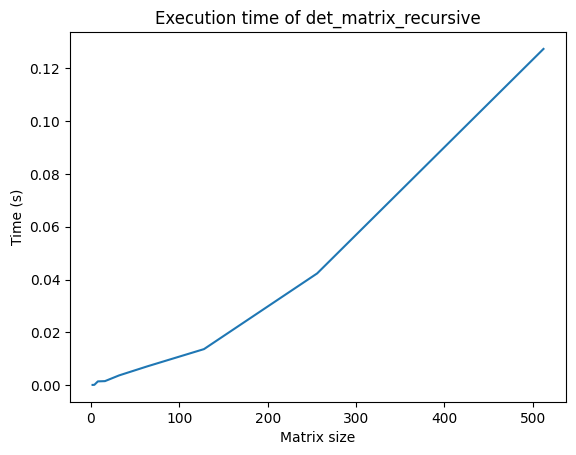

In [9]:
# define the matrix sizes to test
matrix_sizes = [2**i for i in range(1, 10)]

# measure the execution time for each matrix size
det_times = []
det_operations_counts = []
for n in matrix_sizes:
    A = np.random.rand(n, n)
    start_time = time()
    operations_count = 0
    det_matrix_recursive(A)
    det_operations_counts.append(operations_count)
    end_time = time()
    det_times.append(end_time - start_time)

# plot the results
plt.plot(matrix_sizes, det_times)
plt.xlabel('Matrix size')
plt.ylabel('Time (s)')
plt.title('Execution time of det_matrix_recursive')
plt.show()


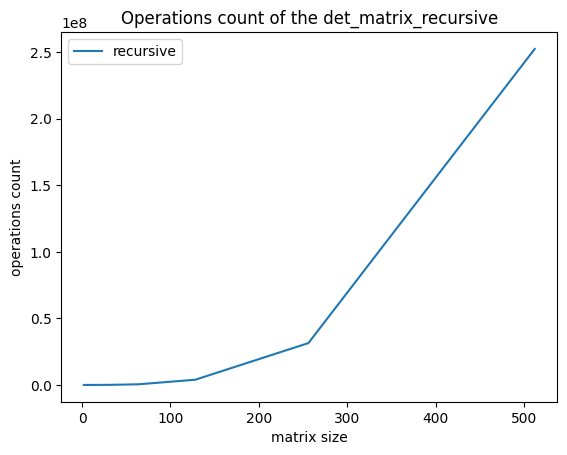

In [10]:
plt.plot(matrix_sizes, det_operations_counts, label='recursive')
plt.xlabel('matrix size')
plt.ylabel('operations count')
plt.title('Operations count of the det_matrix_recursive')
plt.legend()
plt.show()

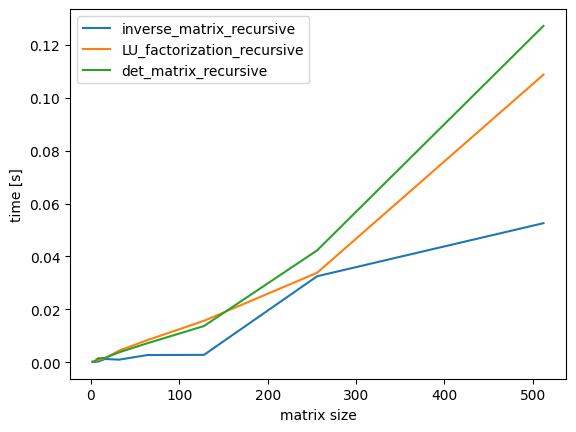

In [11]:
plt.plot(matrix_sizes, inv_times, label='inverse_matrix_recursive')
plt.plot(matrix_sizes, lu_times, label='LU_factorization_recursive')
plt.plot(matrix_sizes, det_times, label='det_matrix_recursive')
plt.xlabel('matrix size')
plt.ylabel('time [s]')
plt.legend()

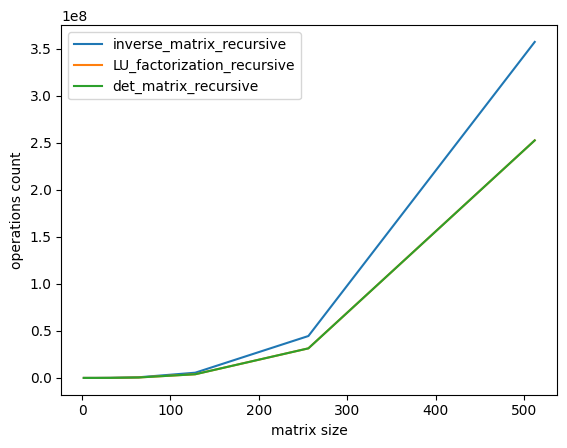

In [12]:
plt.plot(matrix_sizes, inv_operations_counts, label='inverse_matrix_recursive')
plt.plot(matrix_sizes, lu_operations_counts, label='LU_factorization_recursive')
plt.plot(matrix_sizes, det_operations_counts, label='det_matrix_recursive')
plt.xlabel('matrix size')
plt.ylabel('operations count')
plt.legend()


### Oszacowanie złozoności obliczeniowej algorytmów:

Dla rekurencyjnej metody odwracania macierzy złozonosc powinna byc $O(n^3)$ 

Jeśli do mnozenia zostanie uzyty jakikolwiek lepszy algorytm wtedy to: $O(n^{2+e})$ 

Dla Strassena to: $O(n^{2.807})$


https://www.sciencedirect.com/science/article/pii/S0377042708006237#alg2.1

Dla rekurencyjnej metody faktoryzacji LU zlozoność powinna być $O(n^{2+e})$ w zaleznosci od metody uzytej w algorytmie

https://en.wikipedia.org/wiki/LU_decomposition

>If two matrices of order n can be multiplied in time M(n), where M(n) ≥ na for some a > 2, then an LU decomposition can be computed in time O(M(n)). This means, for example, that an $O(n^{2.376})$ algorithm exists based on the Coppersmith–Winograd algorithm.

Proof of regular LU decomposition: 
https://math.stackexchange.com/questions/1330759/time-complexity-of-lu-decomposition


Dla obliczania wyznacznika jest podobnie ze złozonością, w tym przypadku zlozonosc jest taka jak faktoryzacji LU
$O(n^{2+e})$

### Wnioski

1. Złozonosc tych algorytmów mozna zredukować przy uzyciu lepszych algorytmów mnozenia macierzy
